In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of log revenue')

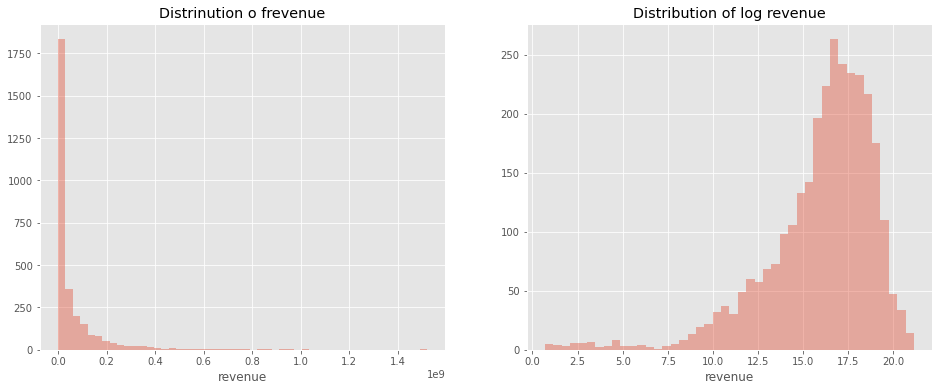

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.distplot(train['revenue'], kde=False);
plt.title('Distrinution o frevenue');
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(train['revenue']), kde=False);
plt.title('Distribution of log revenue')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'log transfromation of revenue vs budget')

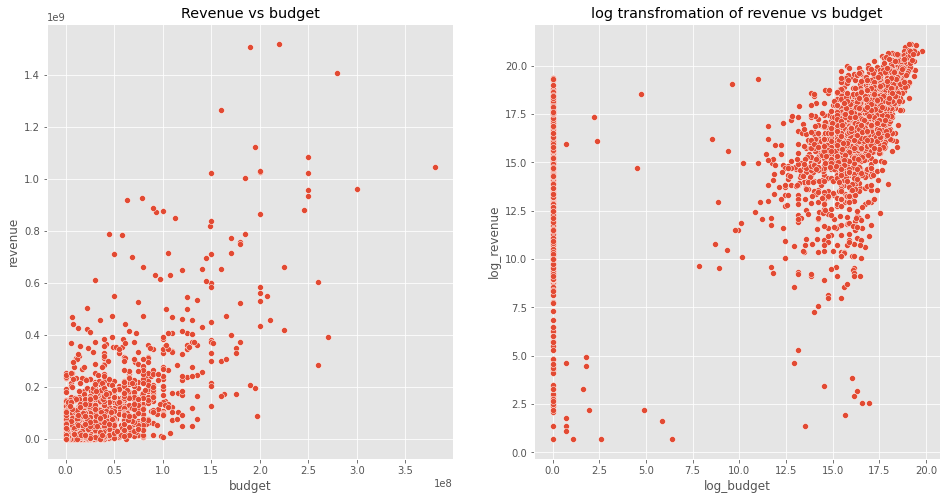

In [ ]:
train['log_revenue'] = np.log1p(train['revenue'])
train['log_budget'] = np.log1p(train['budget'])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
sns.scatterplot(train['log_budget'], train['log_revenue']) 
plt.title('log transfromation of revenue vs budget')


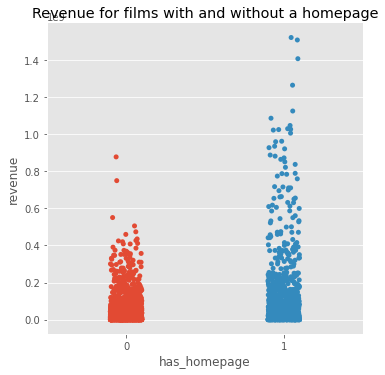

In [ ]:

train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for films with and without a homepage');


Text(0.5, 1.0, 'mean of log revenue per language')

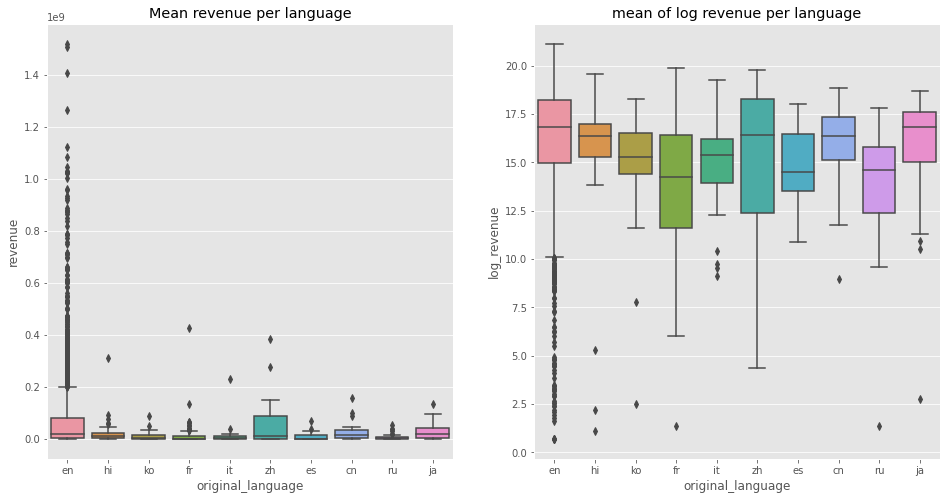

In [ ]:
language_data = train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y = 'revenue', data=language_data )
plt.title('Mean revenue per language')
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y = 'log_revenue', data=language_data)
plt.title('mean of log revenue per language')



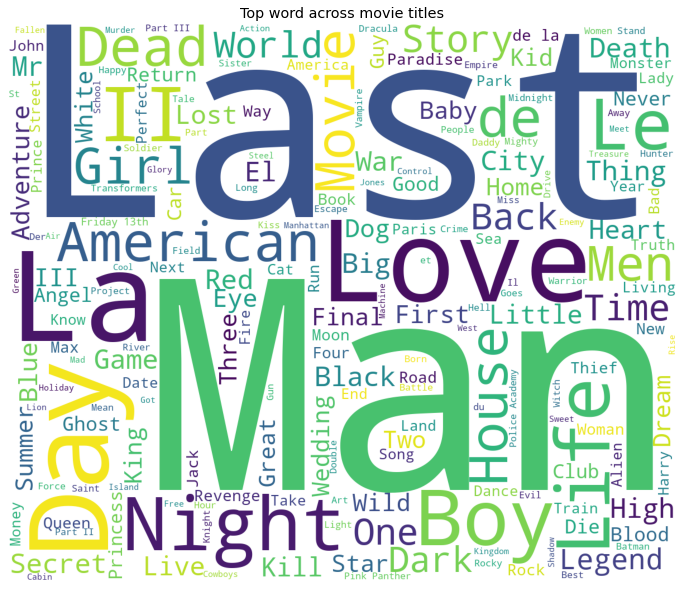

In [ ]:

plt.figure(figsize=(12, 12))
text =  ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None,
                     background_color ='white',
                     width =1200, height =1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top word across movie titles')
plt.axis('off')
plt.show()


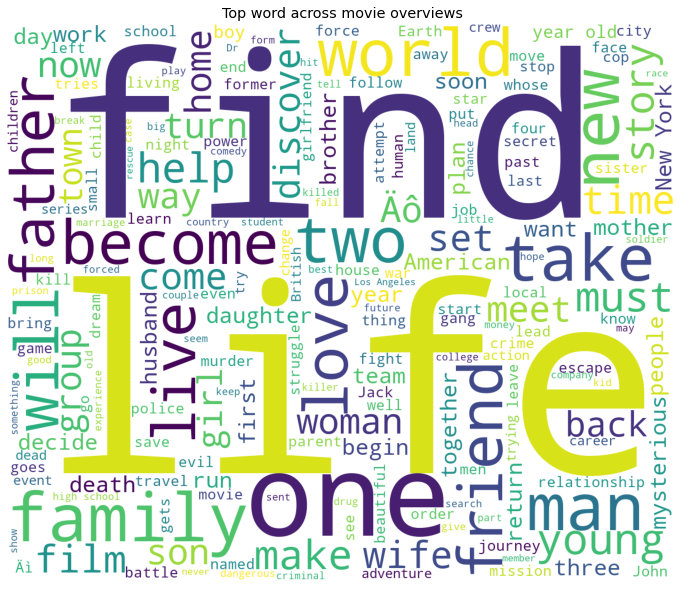

In [ ]:
plt.figure(figsize=(12, 12))
text =  ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None,
                     background_color ='white',
                     width =1200, height =1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top word across movie overviews')
plt.axis('off')
plt.show()
